# Decision Tree using Kaggle Animal Shelter Dataset
https://www.kaggle.com/c/shelter-animal-outcomes

In our last notebook, we created a random forest classifier.  In this one, we'll create a simpler decision tree that still teaches us some interesting things about machine learning.

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv as csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, log_loss, average_precision_score

from textblob import TextBlob

import logging

%matplotlib inline

In [3]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

In [4]:
# Set up my data directories from different machines

mac_data_dir = '/Users/christopherallison/Documents/Coding/Data'
linux_data_dir = '/home/chris/data'
win_data_dir = u'C:\\Users\\Owner\\Documents\\Data'

In [5]:
# Set data directory for example

data_dir = mac_data_dir

In [6]:
# Load our prepared dataset and reference data

X = pd.read_csv(os.path.join(data_dir, "prepared_animals_df.csv"),index_col=0)

In [7]:
# Check our data

X.columns

Index(['OutcomeType', 'AnimalType', 'AgeuponOutcome', 'Color', 'Intact',
       'Gender', 'NameLength', 'BreedKMeans'],
      dtype='object')

In [8]:
# Double check our data

X.head()

,OutcomeType,AnimalType,AgeuponOutcome,Color,Intact,Gender,NameLength,BreedKMeans
0,Return_to_owner,1,1,0,0,1,7,3
1,Euthanasia,0,1,1,0,0,5,0
2,Adoption,1,2,2,0,1,6,1
3,Transfer,0,0,2,1,1,3,0
4,Transfer,1,2,3,0,1,3,3


In [9]:
outcomes = X.OutcomeType.unique()

In [10]:
from sklearn import preprocessing

# This code takes our text labels and creates an encoder that we use
# To transform them into an array

encoder = preprocessing.LabelEncoder()
encoder.fit(outcomes)

encoded_y = encoder.transform(outcomes)
encoded_y

#We can also inverse_transform them back.
list(encoder.inverse_transform([0, 1, 2, 3]))

['Adoption', 'Died', 'Euthanasia', 'Return_to_owner']

We'll now transform the labels into their array value.

In [12]:
X.OutcomeType = encoder.transform(X.OutcomeType)

In [13]:
# Check our work

X.head()

,OutcomeType,AnimalType,AgeuponOutcome,Color,Intact,Gender,NameLength,BreedKMeans
0,3,1,1,0,0,1,7,3
1,2,0,1,1,0,0,5,0
2,0,1,2,2,0,1,6,1
3,4,0,0,2,1,1,3,0
4,4,1,2,3,0,1,3,3


In [44]:
outcomes = encoder.inverse_transform([0, 1, 2, 3, 4])
outcomes

array(['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'], dtype=object)

In [14]:
train_features = X.values[:,1:]
train_features[:5]

array([[1, 1, 0, 0, 1, 7, 3],
       [0, 1, 1, 0, 0, 5, 0],
       [1, 2, 2, 0, 1, 6, 1],
       [0, 0, 2, 1, 1, 3, 0],
       [1, 2, 3, 0, 1, 3, 3]])

In [15]:
train_target = X['OutcomeType'].values
train_target

array([3, 2, 0, ..., 0, 4, 4])

In [16]:
# Set up our train_test_split

X_train, x_test, y_train, y_test = train_test_split(train_features,
                                          train_target,
                                          test_size=0.4,
                                          random_state=42)

In [17]:
X.drop('OutcomeType', axis=1, inplace=True)

In [18]:
# Let's try a different estimator
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

score = dt_clf.score(X_train, y_train)
"Mean accuracy of Decision Tree: {0}".format(score)

'Mean accuracy of Decision Tree: 0.712352684417285'

In [19]:
dt_y_predict = dt_clf.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn import metrics
print ("Accuracy = %.2f" % (accuracy_score(y_test, dt_y_predict)))

Accuracy = 0.58


In [27]:
from sklearn.cross_validation import cross_val_predict

predicted = cross_val_predict(dt_clf, X_train, y_train, cv=10)
metrics.accuracy_score(y_train, predicted) 

0.5834632412545987

In [31]:
from sklearn.externals.six import StringIO

with open(os.path.join(data_dir, "shelter.dot"), 'w') as f:
    f = tree.export_graphviz(dt_clf, out_file=f)

In [ ]:
# Warning - this code block is system intensive and may not work
# on lower spec systems.

import pydotplus as pydot
dot_data = StringIO() 
tree.export_graphviz(dt_clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf(os.path.join(data_dir, "shelter.pdf"))

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.13261 to fit



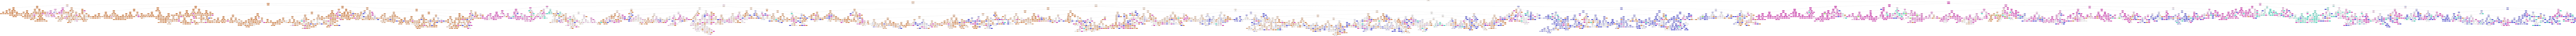

In [21]:
# Warning - this code block is system intensive and may not work
# on lower spec systems.

from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(dt_clf, out_file=dot_data,  
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [32]:
# Evaluate the model
print (X_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16037, 7) (16037,)
(10692, 7) (10692,)


In [33]:
model_score = dt_clf.score(x_test, y_test)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(y_test, dt_y_predict)
print ("Confusion Matrix \n", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.58 

Confusion Matrix 
 [[3309   11   34  459  508]
 [   9    1    2    6   50]
 [ 107    3   98  119  281]
 [ 958    3   82  608  266]
 [1034   24  150  360 2210]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 3309 |  11 |
Actual   |-----|-----|
       1 |   9 |   1 |
         |-----|-----|


In [49]:
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    # Simple plot based on the Iris sample CM
    plt.figure(figsize=(8, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

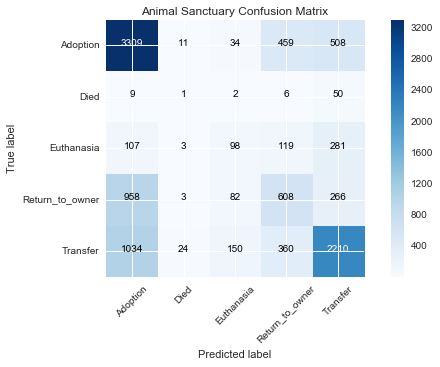

In [50]:
plot_confusion_matrix(confusion_matrix, outcomes, title="Animal Sanctuary Confusion Matrix")

In [51]:
# Plot the importance of the different features

importances = dt_clf.feature_importances_
std = np.std(dt_clf.feature_importances_)
indices = np.argsort(importances)[::-1]

1. feature Intact (0.288194)
2. feature Color (0.203221)
3. feature NameLength (0.180920)
4. feature AgeuponOutcome (0.158292)
5. feature BreedKMeans (0.061080)
6. feature Gender (0.057332)
7. feature AnimalType (0.050960)


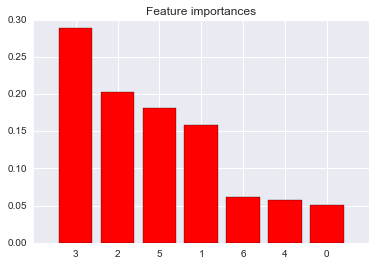

In [53]:
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Our decision tree classifier is actually a fair bit more accurate than the random forest classifier.  It weighs the features similarly, but assigns more weight to the intact feature.  So, what's next.